In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("US-pumpkins.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [4]:
data.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
columns_to_select = ['City Name','Package','Variety', 'Low Price', 'High Price', 'Date']
data = data.loc[:, columns_to_select]

In [6]:
price = (data["Low Price"] + data["High Price"])/2

In [7]:
month = pd.DatetimeIndex(data['Date']).month

In [8]:
new_pumpkins = pd.DataFrame({'Month': month, 'Package': data['Package'],'Variety':data['Variety'], 'Low Price': data['Low Price'],'High Price': data['High Price'], 'Price': price})

In [9]:
data = data[data['Package'].str.contains('bushel', case=True, regex=True)]

In [10]:
print(data)

      City Name               Package    Variety  Low Price  High Price  \
70    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      15.00        15.0   
71    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      18.00        18.0   
72    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      18.00        18.0   
73    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      17.00        17.0   
74    BALTIMORE  1 1/9 bushel cartons   PIE TYPE      15.00        15.0   
...         ...                   ...        ...        ...         ...   
1738  ST. LOUIS    1/2 bushel cartons  MINIATURE      15.00        15.0   
1739  ST. LOUIS    1/2 bushel cartons  MINIATURE      13.75        15.0   
1740  ST. LOUIS    1/2 bushel cartons  MINIATURE      10.75        15.0   
1741  ST. LOUIS    1/2 bushel cartons  MINIATURE      12.00        12.0   
1742  ST. LOUIS    1/2 bushel cartons  MINIATURE      12.00        12.0   

         Date  
70    9/24/16  
71    9/24/16  
72    10/1/16  
73    10/1/16  
74    10/8/16  
...

In [11]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Pumpkin Price')

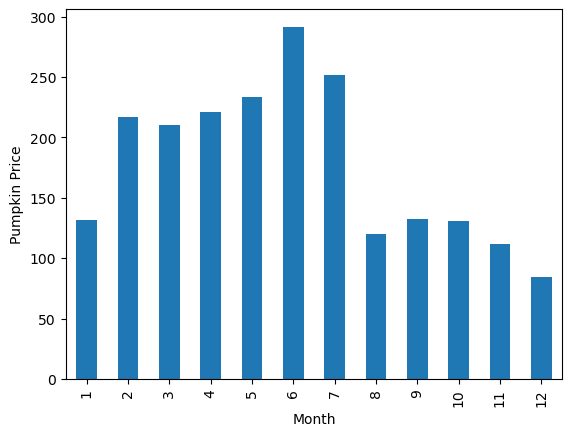

In [13]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

<AxesSubplot:xlabel='Variety'>

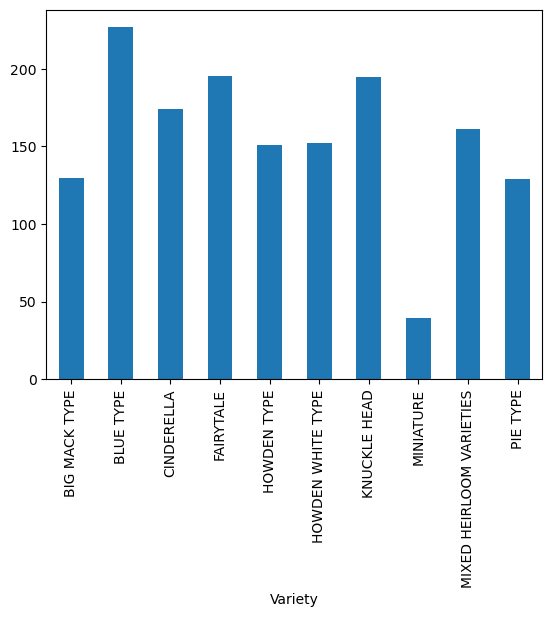

In [14]:
new_pumpkins.groupby('Variety')['Price'].mean().plot(kind='bar')

In [14]:
import datetime

new_pumpkins['day_of_year'] = pd.to_datetime(data['Date']).apply(lambda dt: (dt-datetime.datetime(dt.year,1,1)).days)


In [15]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])
new_pumpkins['DayOfYear'] = data['Date'].dt.dayofyear  # This calculates the day of the year

# Calculate correlations
print(new_pumpkins['Month'].corr(new_pumpkins['Price']))
print(new_pumpkins['DayOfYear'].corr(new_pumpkins['Price']))


-0.14091741552940096
-0.16690092505934478


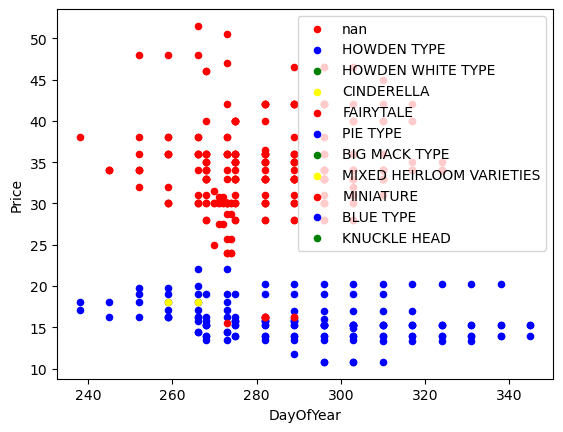

In [16]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i % len(colors)],label=var)


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

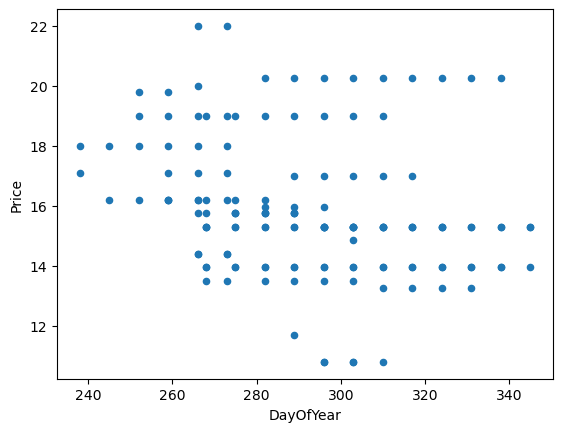

In [17]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [19]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        144 non-null    int64  
 1   Package      144 non-null    object 
 2   Variety      144 non-null    object 
 3   Low Price    144 non-null    float64
 4   High Price   144 non-null    float64
 5   Price        144 non-null    float64
 6   day_of_year  144 non-null    float64
 7   DayOfYear    144 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.1+ KB


C:\Users\KIIT\AppData\Local\Temp\ipykernel_12308\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)


In [20]:
pie_pumpkins.head()

,Month,Package,Variety,Low Price,High Price,Price,day_of_year,DayOfYear
70,9,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,13.5,267.0,268.0
71,9,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,16.2,267.0,268.0
72,10,1 1/9 bushel cartons,PIE TYPE,18.0,18.0,16.2,274.0,275.0
73,10,1 1/9 bushel cartons,PIE TYPE,17.0,17.0,15.3,274.0,275.0
74,10,1 1/9 bushel cartons,PIE TYPE,15.0,15.0,13.5,281.0,282.0


In [21]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.76 (17.3%)


In [25]:
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04499342423558472


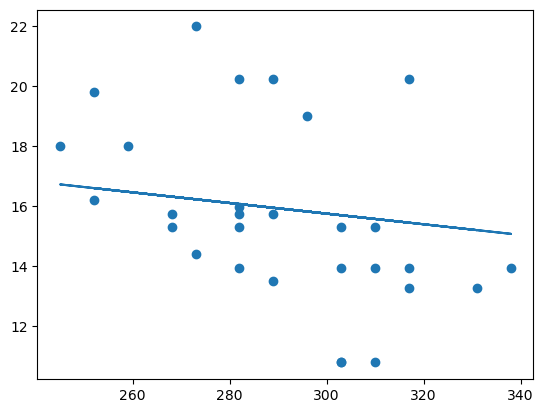

In [26]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline=make_pipeline(PolynomialFeatures(2),LinearRegression())
pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [28]:
pd.get_dummies(new_pumpkins['Variety'])

,BIG MACK TYPE,BLUE TYPE,CINDERELLA,FAIRYTALE,HOWDEN TYPE,HOWDEN WHITE TYPE,KNUCKLE HEAD,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1752,0,0,0,0,0,0,0,1,0,0
1753,0,0,0,0,0,0,0,1,0,0
1754,0,0,0,0,0,0,0,1,0,0
1755,0,0,0,0,0,0,0,1,0,0


In [29]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [30]:
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

In [31]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 1.06e+10 (1.88e+03%)
Model determination:  0.77329769966678
